In [4]:
import keras


In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten


In [6]:
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical


In [8]:
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [12]:
import random

In [13]:
X_train = np.loadtxt("C:\\Users\\srush\\deep learning\\input.csv",delimiter = ",")
Y_train = np.loadtxt("C:\\Users\\srush\\deep learning\\labels.csv",delimiter = ",")
X_test =np.loadtxt("C:\\Users\\srush\\deep learning\\input_test.csv",delimiter = ",")
Y_test =np.loadtxt("C:\\Users\\srush\\deep learning\\labels_test.csv",delimiter = ",")

In [14]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
print("Shape of X Train:",X_train.shape)
print("Shape of Y Train:",Y_train.shape)
print("Shape of X Test:",X_test.shape)
print("Shape of Y Test:",Y_test.shape)

Shape of X Train: (2000, 100, 100, 3)
Shape of Y Train: (2000, 1)
Shape of X Test: (400, 100, 100, 3)
Shape of Y Test: (400, 1)


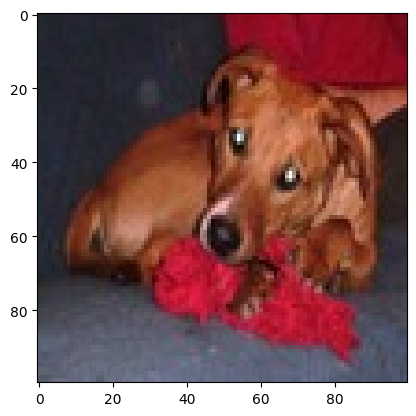

In [16]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [17]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid'),
    
])

C:\Users\srush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
    

In [19]:
model.compile(loss ='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [20]:
model.fit(X_train,Y_train,epochs = 5,batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.5266 - loss: 0.7191
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5780 - loss: 0.6700
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.6567 - loss: 0.6217
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.6825 - loss: 0.6061
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7808 - loss: 0.4794


In [21]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7552 - loss: 0.5082


[0.6125619411468506, 0.6625000238418579]

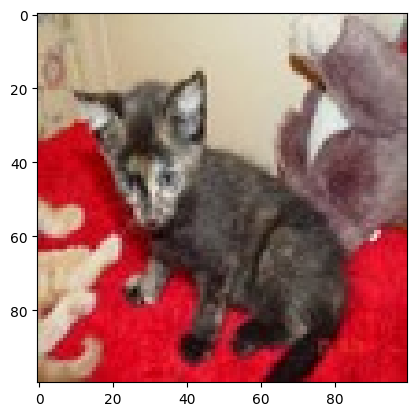

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Model says it is a: cat


In [22]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = "dog"
else:
    pred = "cat"

print("Model says it is a:",pred)